In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import os 
import PIL
import glob


%matplotlib inline


Image Width is 1000
Image Height is 750


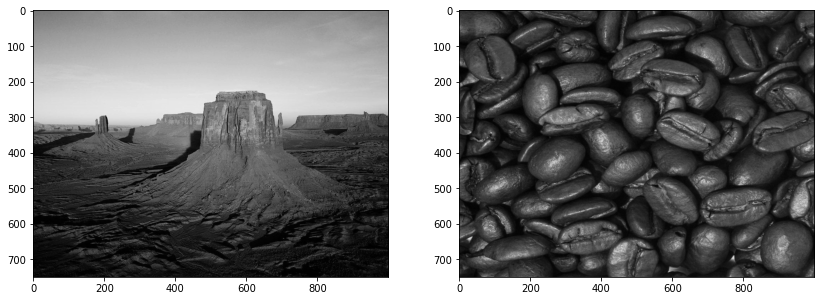

In [5]:
desert = cv2.imread('/content/desert.jpg', 0)
coffee = cv2.imread('/content/New_Coffee.jpg', 0)
print('Image Width is',desert.shape[1])
print('Image Height is',desert.shape[0])
new_width = int(desert.shape[1])
new_height = int(desert.shape[0])
coffee= cv2.resize(coffee, (new_width, new_height))
plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(desert, cmap='gray')
plt.subplot(122)
plt.imshow(coffee, cmap='gray')
plt.show()

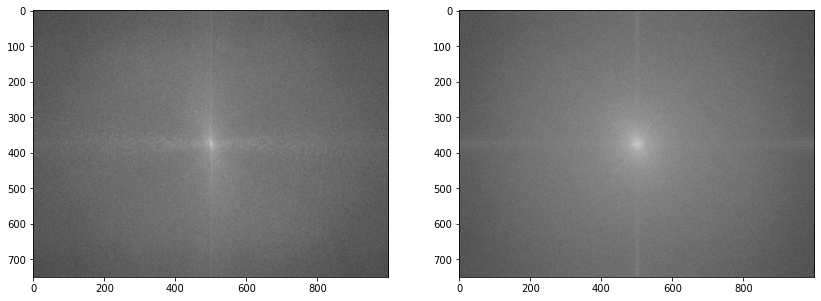

In [6]:
desert_fft = np.fft.fftshift(np.fft.fft2(desert))
coffee_fft = np.fft.fftshift(np.fft.fft2(coffee))

plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(np.abs(desert_fft)), cmap='gray')
plt.subplot(122)
plt.imshow(np.log(np.abs(coffee_fft)), cmap='gray')
plt.show()

(750, 1000)
______
(750, 1000)


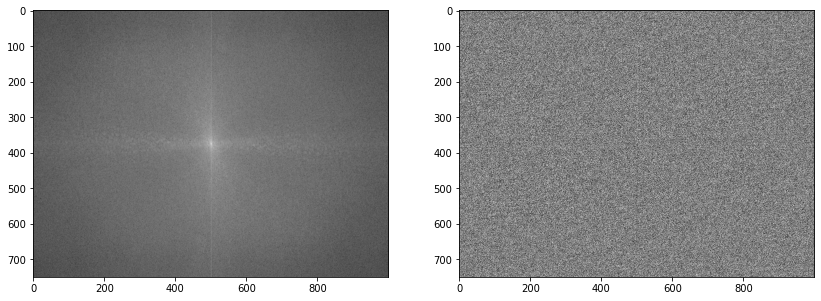

In [7]:
desert_amplitude = np.sqrt(np.real(desert_fft) ** 2 + np.imag(desert_fft) ** 2)
print(desert_amplitude.shape)
print("______")
desert_phase = np.arctan2(np.imag(desert_fft), np.real(desert_fft))
coffee_amplitude = np.sqrt(np.real(coffee_fft) ** 2 + np.imag(coffee_fft) ** 2)
coffee_phase = np.arctan2(np.imag(coffee_fft), np.real(coffee_fft))
print(coffee_phase.shape)
plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(desert_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(desert_phase, cmap='gray')

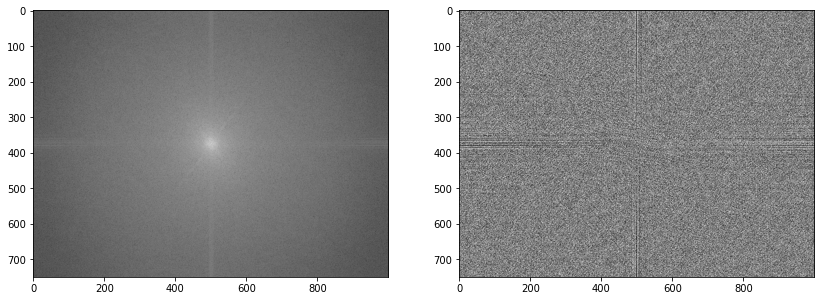

In [8]:
plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(coffee_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(coffee_phase, cmap='gray')

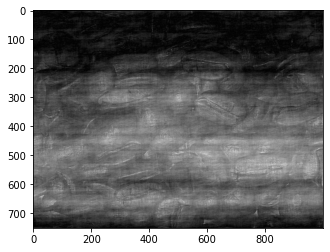

In [11]:
# amplitude_phase
desert_coffee_comb = np.multiply(desert_amplitude, np.exp(1j * coffee_phase))
desert_coffee = np.real(np.fft.ifft2(desert_coffee_comb))  # drop imagniary as they are around 1e-14

# # combined image has values < 0 and > 1, needs to be scaled.
# plt.figure(figsize=(15, 20))
# plt.subplot(131)
plt.imshow(np.abs(desert_coffee), cmap='gray')
# plt.subplot(132)
# desert_coffee_shift = desert_coffee + desert_coffee.min()
# desert_coffee_shift[desert_coffee_shift>255] = 255
# plt.imshow(desert_coffee_shift)
# plt.subplot(133)
# desert_coffee[desert_coffee>255] = 255
# desert_coffee[desert_coffee <0] = 0
# plt.imshow(desert_coffee)

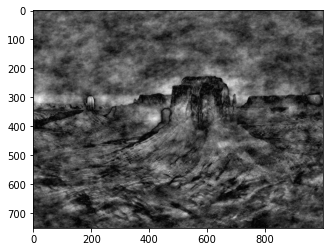

In [13]:
coffee_desert_comb = np.multiply(coffee_amplitude, np.exp(1j * desert_phase))
coffee_desert = np.real(np.fft.ifft2(coffee_desert_comb))
plt.imshow(np.abs(coffee_desert), cmap='gray')